# 卒業研究12：実験データのみ
#### 坂西和也

# 実験データの読み込み


In [28]:
import os

# カレントディレクトリを取得
data_path = os.getcwd()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSVファイルを読み込む 
data_mark = pd.read_csv(data_path + '/AbExist.csv' , delimiter=r'\t')
# 列名を修正
data_mark = data_mark.rename(columns={'"S8SVel02Scaled': 'S8SVel02Scaled', 'S8SRuma030"': 'S8SRuma030'})

# 余分なダブルクォーテーションを取り除く
data_mark["S8SVel02Scaled"] = data_mark["S8SVel02Scaled"].str.replace('"', '').astype(float)
data_mark["S8SRuma030"] = data_mark["S8SRuma030"].str.replace('"', '').astype(int)

/tmp/ipykernel_87669/1927591562.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_mark = pd.read_csv(data_path + '/AbExist.csv' , delimiter=r'\t')


In [30]:
# CSVファイルを読み込む
noab_data = pd.read_csv(data_path + '/NoAb.csv', delimiter=r'\t')
# 列名を修正
noab_data = noab_data.rename(columns={'"S8SV02Scaled': 'S8SV02Scaled', 'S8SEr005"': 'S8SEr005'})

# 余分なダブルクォーテーションを取り除く
noab_data["S8SV02Scaled"] = noab_data["S8SV02Scaled"].str.replace('"', '').astype(float)
noab_data["S8SEr005"] = noab_data["S8SEr005"].str.replace('"', '').astype(int)

/tmp/ipykernel_87669/2655631427.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  noab_data = pd.read_csv(data_path + '/NoAb.csv', delimiter=r'\t')


In [31]:
data_mark.head()

,S8SVel02Scaled,S8SRuma003,S8SRuma006,S8SRuma009,S8SRuma012,S8SRuma015,S8SRuma018,S8SRuma021,S8SRuma024,S8SRuma027,S8SRuma030
0,-27.206436,431,866,1422,1989,2510,3048,3514,4143,4676,5029
1,-27.190086,366,785,1333,1839,2354,2865,3354,3929,4476,4865
2,-27.157355,344,787,1332,1844,2366,2904,3395,4005,4568,4956
3,-27.108253,373,785,1327,1895,2336,2851,3274,3859,4397,4792
4,-27.042823,367,792,1295,1795,2299,2816,3250,3856,4423,4788


In [32]:
noab_data.head()

,S8SV02Scaled,S8SEr003,S8SEr004,S8SEr005
0,-53.892207,626.0,1332,2659
1,-53.043510,584.0,1217,2506
2,-52.194814,650.0,1326,2613
3,-51.346118,586.0,1249,2533
4,-50.497422,644.0,1296,2546


In [33]:
print(len(data_mark))
print(len(noab_data))

128
128


# データの可視化


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

## ピークの見えるデータ

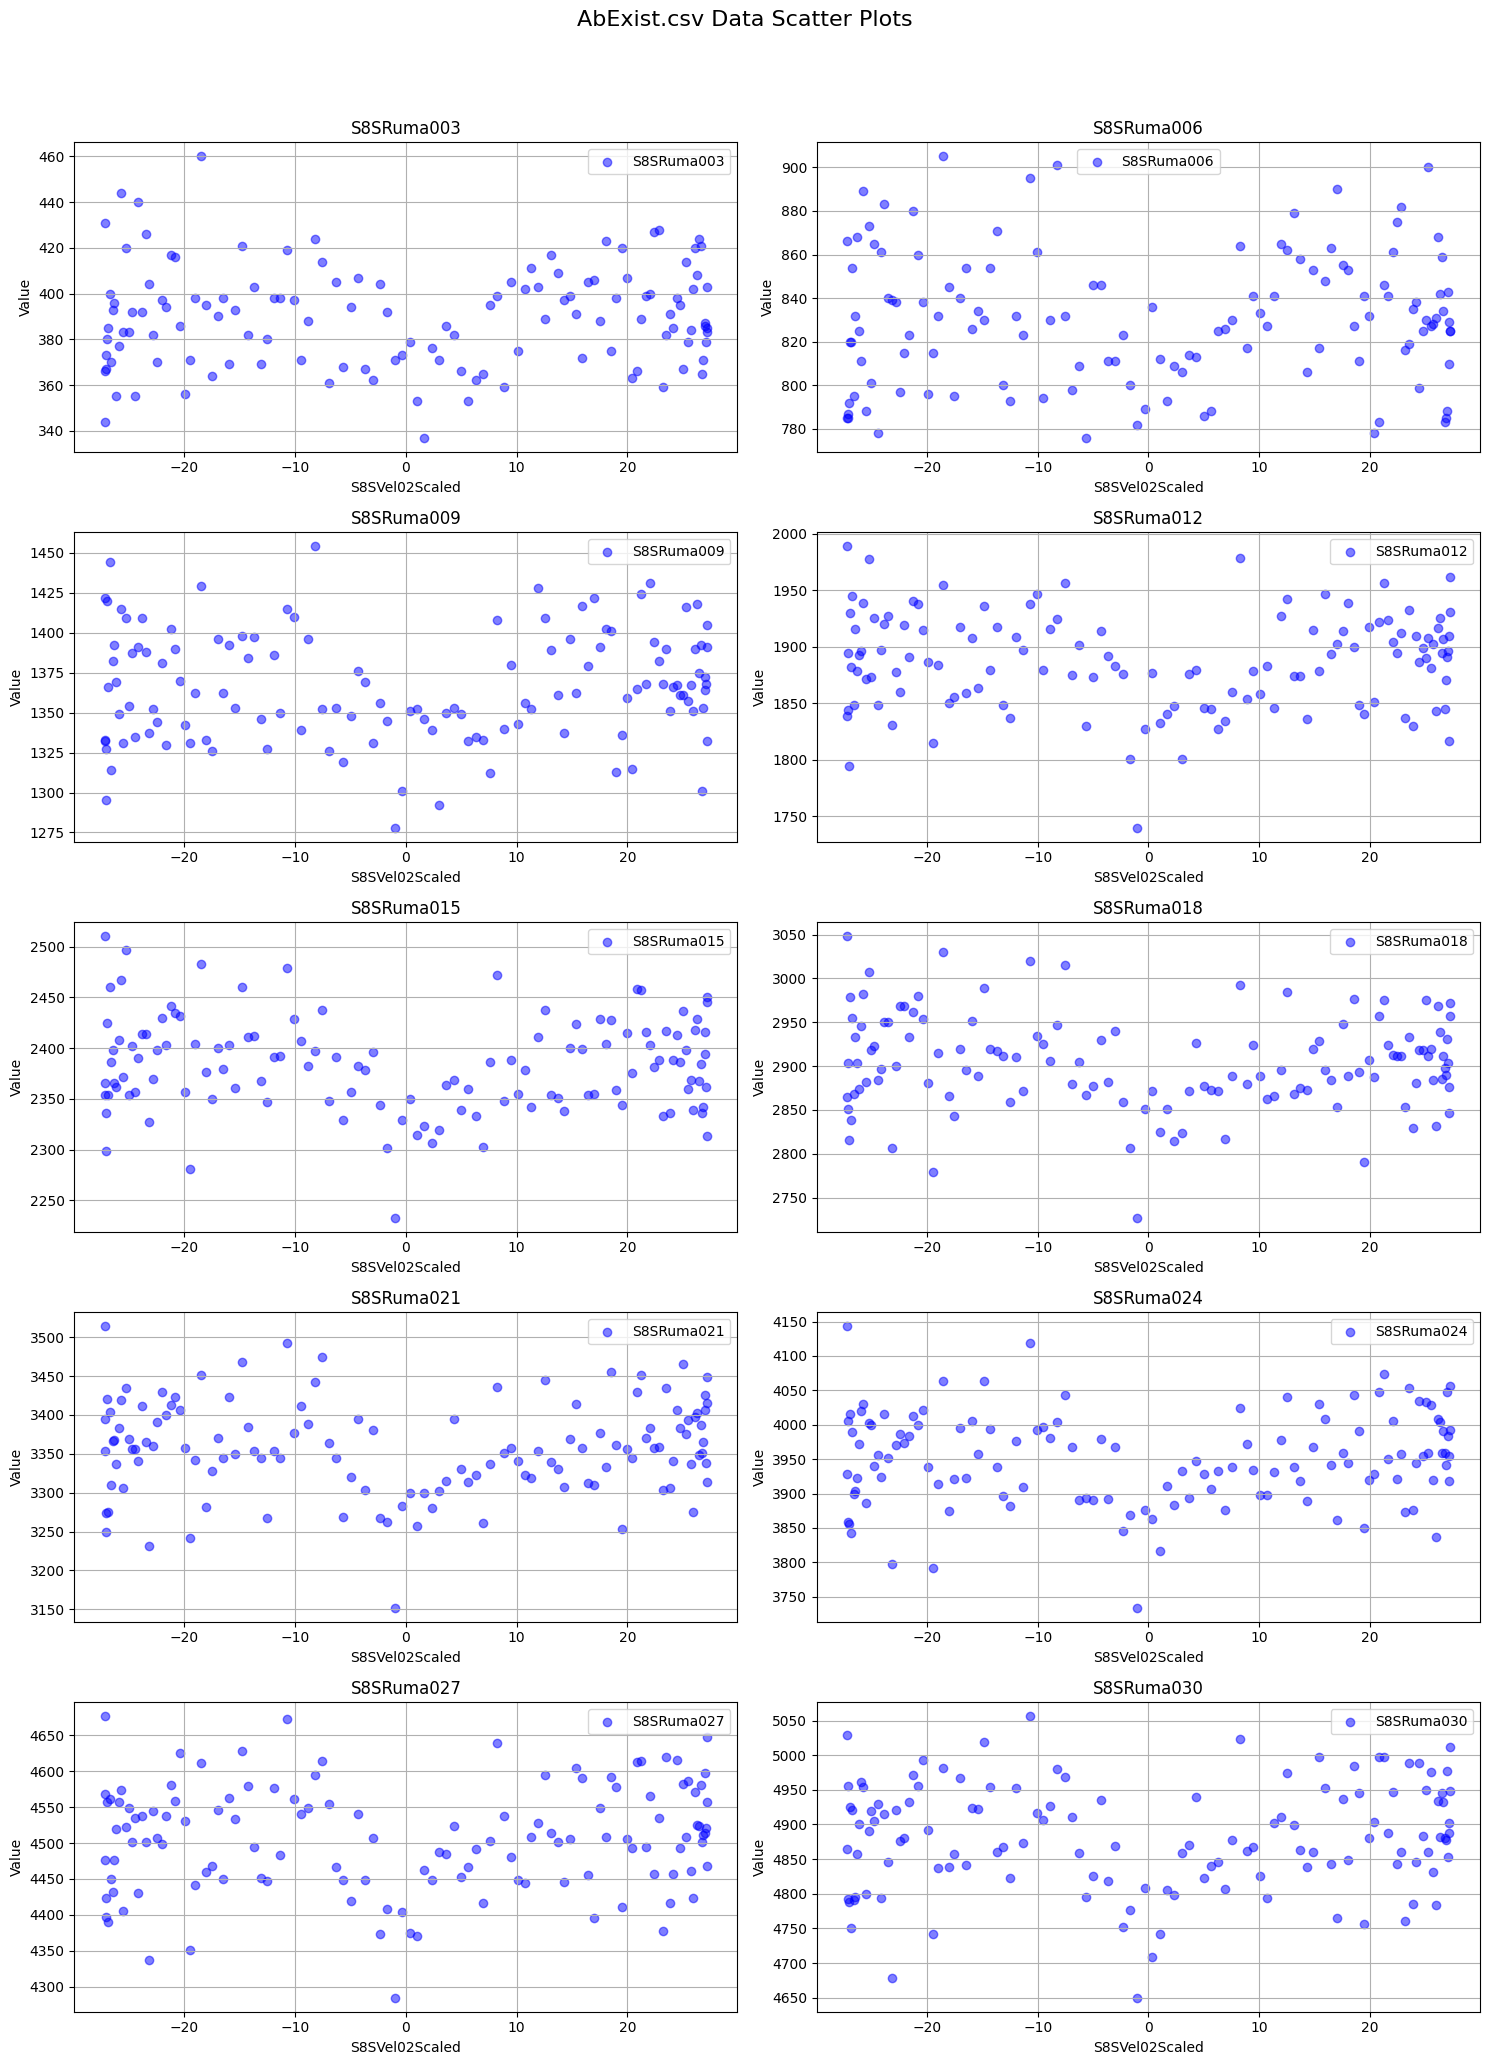

In [35]:
# AbExist.csvのデータを散布図で可視化
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('AbExist.csv Data Scatter Plots', fontsize=16, y=1.03)
columns = data_mark.columns[1:]
x = data_mark['S8SVel02Scaled']
for i, ax in enumerate(axs.flat):
    ax.scatter(x, data_mark[columns[i]], label=columns[i], color='b', alpha=0.5)
    ax.set_title(columns[i])
    ax.set_xlabel('S8SVel02Scaled')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## ピークの見えないデータ

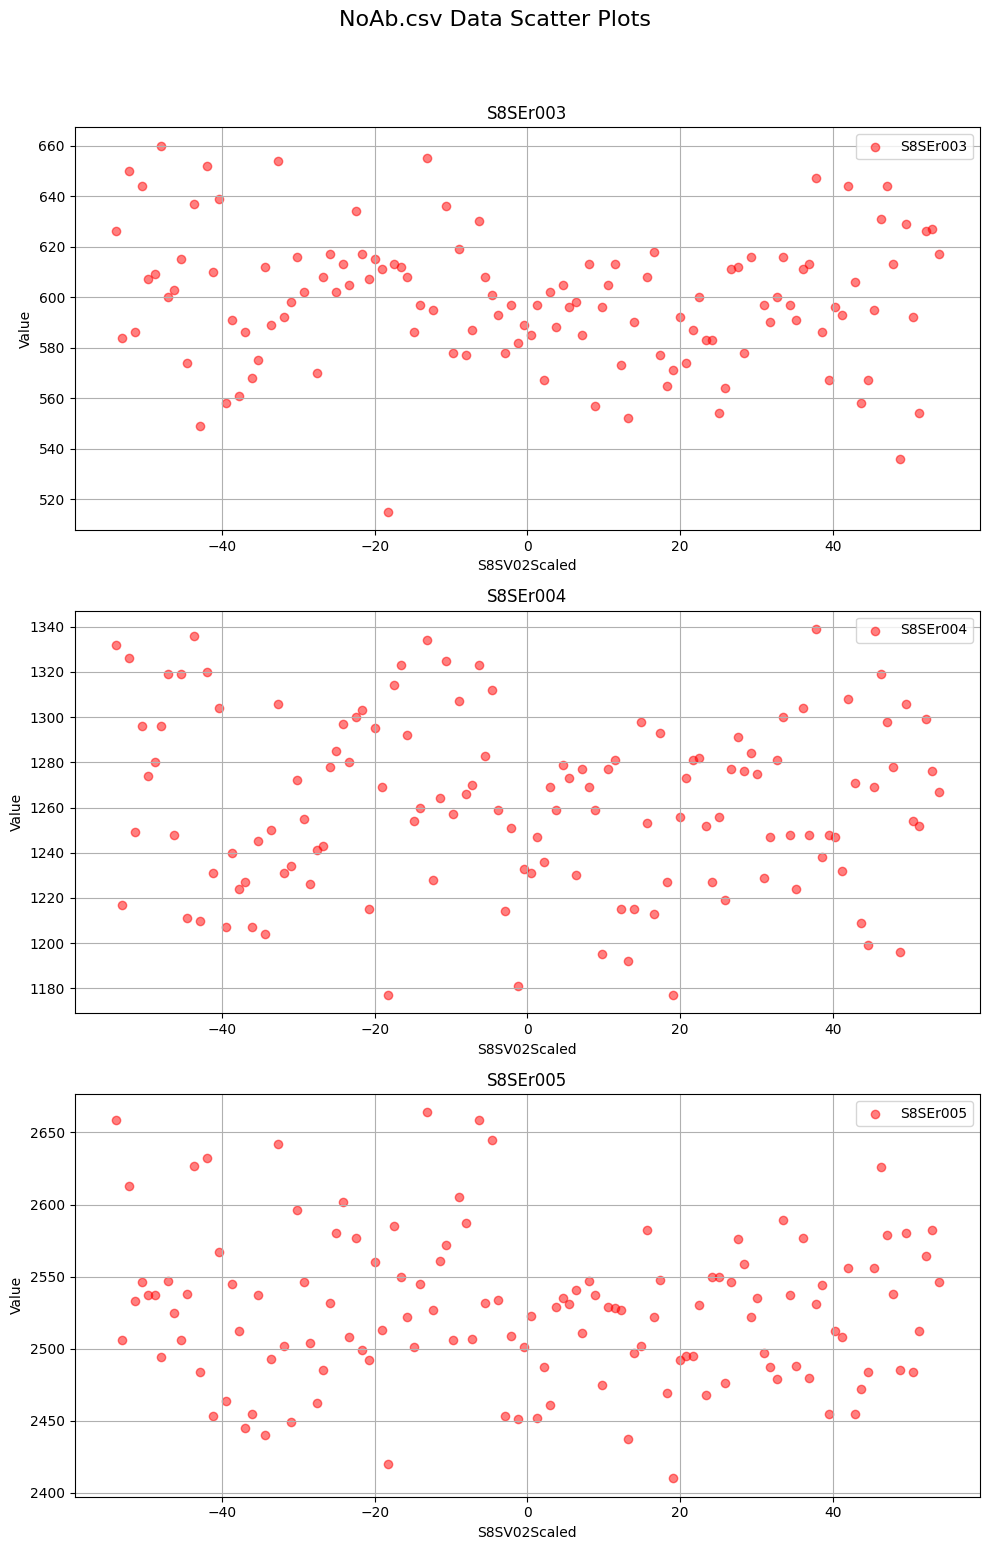

In [36]:
# NoAb.csvのデータを散布図で可視化
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('NoAb.csv Data Scatter Plots', fontsize=16, y=1.03)
x_noab = noab_data['S8SV02Scaled']
columns_noab = noab_data.columns[1:]
for i, ax in enumerate(axs):
    ax.scatter(x_noab, noab_data[columns_noab[i]], label=columns_noab[i], color='r', alpha=0.5)
    ax.set_title(columns_noab[i])
    ax.set_xlabel('S8SV02Scaled')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

実験データはカウント数がばらばらで，どの形のピークなのかがわからない．

## データの比率変化
各カラムの1行目の値で割る

In [37]:
import pandas as pd

# AbExist.csvとNoAb.csvを読み込む
abexist_data = pd.read_csv(data_path + '/AbExist.csv', delimiter=r'\t')
noab_data = pd.read_csv(data_path + '/NoAb.csv', delimiter=r'\t')

# 列名を修正
abexist_data = abexist_data.rename(columns={'"S8SVel02Scaled': 'S8SVel02Scaled', 'S8SRuma030"': 'S8SRuma030'})

# 余分なダブルクォーテーションを取り除く
abexist_data["S8SVel02Scaled"] = abexist_data["S8SVel02Scaled"].str.replace('"', '').astype(float)
abexist_data["S8SRuma030"] = abexist_data["S8SRuma030"].str.replace('"', '').astype(int)

# 列名を修正
noab_data = noab_data.rename(columns={'"S8SV02Scaled': 'S8SV02Scaled', 'S8SEr005"': 'S8SEr005'})

# NoAb.csvのカラム名の修正
noab_data = noab_data.rename(columns={'"S8SV02Scaled': 'S8SV02Scaled', 'S8SEr005"': 'S8SEr005'})
noab_data["S8SV02Scaled"] = noab_data["S8SV02Scaled"].str.replace('"', '').astype(float)
noab_data["S8SEr005"] = noab_data["S8SEr005"].str.replace('"', '').astype(int)

# 2つのデータフレームを結合
data = pd.concat([abexist_data, noab_data], axis=1)

# 各カラムの値を、そのカラムの1行目の値で割る
for col in data.columns:
    data[col] = data[col] / data[col].iloc[0]

data


/tmp/ipykernel_87669/3514930392.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  abexist_data = pd.read_csv(data_path + '/AbExist.csv', delimiter=r'\t')
/tmp/ipykernel_87669/3514930392.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  noab_data = pd.read_csv(data_path + '/NoAb.csv', delimiter=r'\t')


,S8SVel02Scaled,S8SRuma003,S8SRuma006,S8SRuma009,S8SRuma012,S8SRuma015,S8SRuma018,S8SRuma021,S8SRuma024,S8SRuma027,S8SRuma030,S8SV02Scaled,S8SEr003,S8SEr004,S8SEr005
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999399,0.849188,0.906467,0.937412,0.924585,0.937849,0.939961,0.954468,0.948347,0.957228,0.967389,0.984252,0.932907,0.913664,0.942460
2,0.998196,0.798144,0.908776,0.936709,0.927099,0.942629,0.952756,0.966135,0.966691,0.976903,0.985484,0.968504,1.038339,0.995495,0.982700
3,0.996391,0.865429,0.906467,0.933193,0.952740,0.930677,0.935367,0.931702,0.931451,0.940334,0.952873,0.952756,0.936102,0.937688,0.952614
4,0.993986,0.851508,0.914550,0.910689,0.902464,0.915936,0.923885,0.924872,0.930727,0.945894,0.952078,0.937008,1.028754,0.972973,0.957503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-0.993981,0.895592,0.973441,0.964838,0.953243,0.953785,0.952428,0.974957,0.961622,0.965355,0.965003,-0.937008,0.945687,0.941441,0.934186
124,-0.996388,0.879350,0.957275,0.962025,0.960282,0.941036,0.943570,0.949915,0.954622,0.966852,0.974746,-0.952756,0.884984,0.939940,0.944716
125,-0.998193,0.888631,0.935335,0.936709,0.913524,0.921514,0.933727,0.943085,0.945692,0.955518,0.971764,-0.968504,1.000000,0.975225,0.964272
126,-0.999397,0.893271,0.952656,0.978200,0.986425,0.976096,0.975066,0.981503,0.979242,0.994012,0.996620,-0.984252,1.001597,0.957958,0.971042


In [38]:
# S8SVel02Scaled から S8SRuma030 までのカラムを持つデータフレーム
data_abexist = data[['S8SVel02Scaled', 'S8SRuma003', 'S8SRuma006',  'S8SRuma009', 
                     'S8SRuma012', 'S8SRuma015', 'S8SRuma018', 'S8SRuma021',
                        'S8SRuma024', 'S8SRuma027', 'S8SRuma030']]

# S8SV02Scaled から S8SEr005 までのカラムを持つデータフレーム
data_noab = data[['S8SV02Scaled','S8SEr003', 'S8SEr004', 'S8SEr005']]

data_abexist["S8SVel02Scaled"] = data_abexist["S8SVel02Scaled"] * -1
data_noab["S8SV02Scaled"] = data_noab["S8SV02Scaled"] * -1

/tmp/ipykernel_87669/3401219199.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_abexist["S8SVel02Scaled"] = data_abexist["S8SVel02Scaled"] * -1
/tmp/ipykernel_87669/3401219199.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_noab["S8SV02Scaled"] = data_noab["S8SV02Scaled"] * -1


In [39]:
data_abexist.head()

,S8SVel02Scaled,S8SRuma003,S8SRuma006,S8SRuma009,S8SRuma012,S8SRuma015,S8SRuma018,S8SRuma021,S8SRuma024,S8SRuma027,S8SRuma030
0,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.999399,0.849188,0.906467,0.937412,0.924585,0.937849,0.939961,0.954468,0.948347,0.957228,0.967389
2,-0.998196,0.798144,0.908776,0.936709,0.927099,0.942629,0.952756,0.966135,0.966691,0.976903,0.985484
3,-0.996391,0.865429,0.906467,0.933193,0.952740,0.930677,0.935367,0.931702,0.931451,0.940334,0.952873
4,-0.993986,0.851508,0.914550,0.910689,0.902464,0.915936,0.923885,0.924872,0.930727,0.945894,0.952078


In [40]:
data_noab.head()

,S8SV02Scaled,S8SEr003,S8SEr004,S8SEr005
0,-1.000000,1.000000,1.000000,1.000000
1,-0.984252,0.932907,0.913664,0.942460
2,-0.968504,1.038339,0.995495,0.982700
3,-0.952756,0.936102,0.937688,0.952614
4,-0.937008,1.028754,0.972973,0.957503


In [41]:
# 組み合わせる
X = pd.concat([data_abexist, data_noab], axis=1)
X.drop('S8SV02Scaled', axis=1, inplace=True)

In [42]:
nan_counts = np.isnan(X).sum(axis=0)
print(nan_counts)

S8SVel02Scaled    0
S8SRuma003        0
S8SRuma006        0
S8SRuma009        0
S8SRuma012        0
S8SRuma015        0
S8SRuma018        0
S8SRuma021        0
S8SRuma024        0
S8SRuma027        0
S8SRuma030        0
S8SEr003          4
S8SEr004          0
S8SEr005          0
dtype: int64


In [43]:
from sklearn.impute import SimpleImputer
# 欠損値保管
# Creating an imputer object that replaces NaN values with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Applying the imputer only to the 'S8SEr003' column
X['S8SEr003'] = imputer.fit_transform(X[['S8SEr003']])


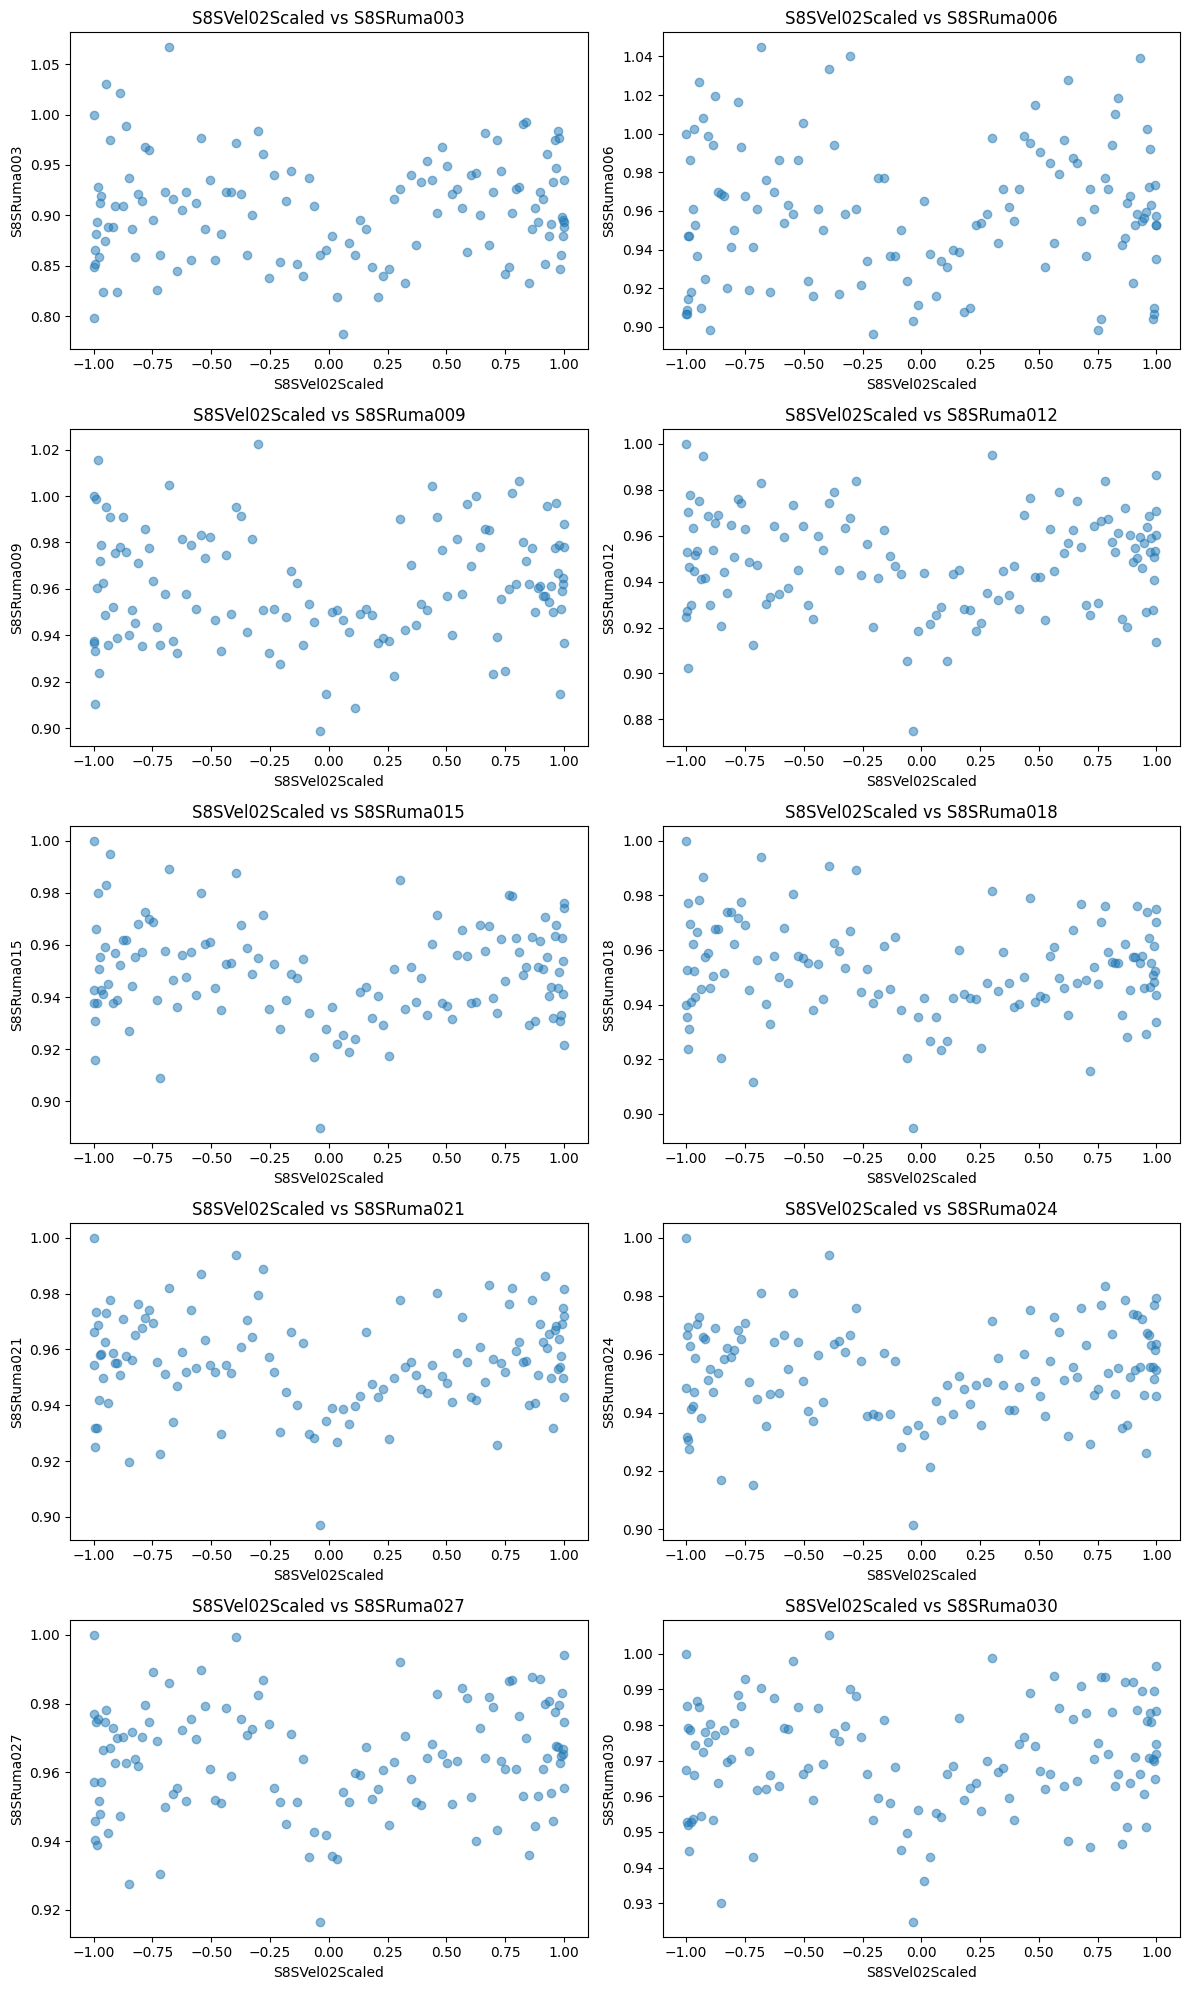

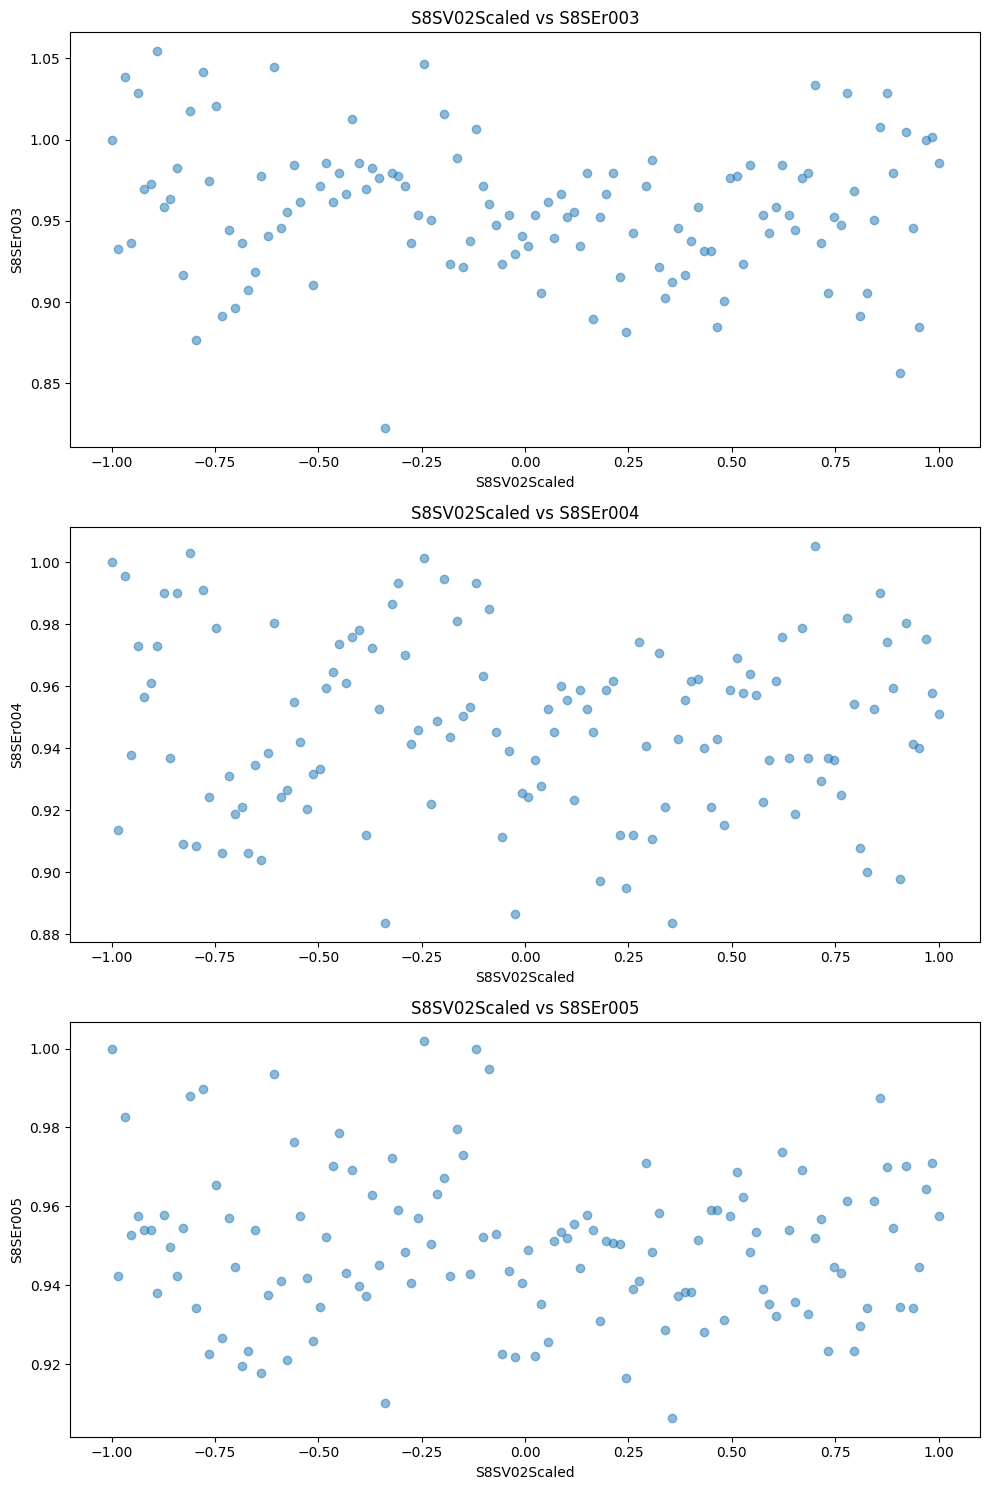

In [44]:
import matplotlib.pyplot as plt

# data_abexistの散布図
fig1, axes1 = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

x_data_abexist = data_abexist["S8SVel02Scaled"]
for idx, col in enumerate(data_abexist.columns[1:]):
    ax = axes1[idx // 2, idx % 2]
    ax.scatter(x_data_abexist, data_abexist[col], alpha=0.5)
    ax.set_title(f'S8SVel02Scaled vs {col}')
    ax.set_xlabel('S8SVel02Scaled')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

# data_noabの散布図
fig2, axes2 = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

x_data_noab = data_noab["S8SV02Scaled"]
for idx, col in enumerate(data_noab.columns[1:]):
    axes2[idx].scatter(x_data_noab, data_noab[col], alpha=0.5)
    axes2[idx].set_title(f'S8SV02Scaled vs {col}')
    axes2[idx].set_xlabel('S8SV02Scaled')
    axes2[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

In [45]:
X.drop('S8SVel02Scaled', axis=1, inplace=True)
X.head()

,S8SRuma003,S8SRuma006,S8SRuma009,S8SRuma012,S8SRuma015,S8SRuma018,S8SRuma021,S8SRuma024,S8SRuma027,S8SRuma030,S8SEr003,S8SEr004,S8SEr005
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.849188,0.906467,0.937412,0.924585,0.937849,0.939961,0.954468,0.948347,0.957228,0.967389,0.932907,0.913664,0.942460
2,0.798144,0.908776,0.936709,0.927099,0.942629,0.952756,0.966135,0.966691,0.976903,0.985484,1.038339,0.995495,0.982700
3,0.865429,0.906467,0.933193,0.952740,0.930677,0.935367,0.931702,0.931451,0.940334,0.952873,0.936102,0.937688,0.952614
4,0.851508,0.914550,0.910689,0.902464,0.915936,0.923885,0.924872,0.930727,0.945894,0.952078,1.028754,0.972973,0.957503


In [46]:
y = [1] * 10 + [0] * 3
y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

# ロジスティック回帰

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



/home/taichi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/taichi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/taichi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


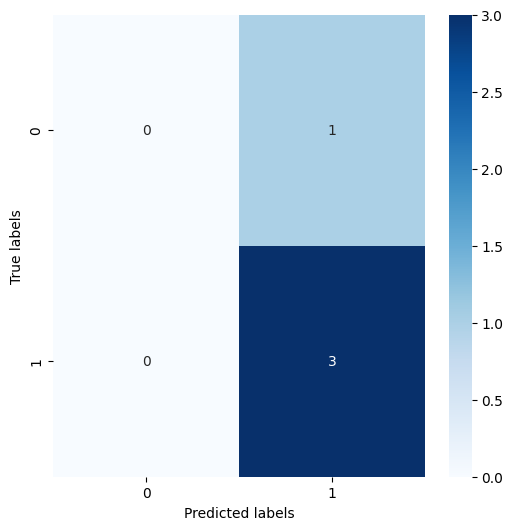

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X =X
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [48]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: S8SEr003, Prediction: 1
Sample: S8SRuma018, Prediction: 1
Sample: S8SRuma024, Prediction: 1
Sample: S8SRuma027, Prediction: 1


# ニューラルネットワーク

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = X
y = y

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# MLPClassifierのインスタンス化
clf = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=1000,
    random_state=111,
    solver='adam',
    alpha=0.1,
)

# モデルの訓練
clf.fit(X_train, y_train)

# テストデータでの予測
y_pred = clf.predict(X_test)

# 正確さの計算
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



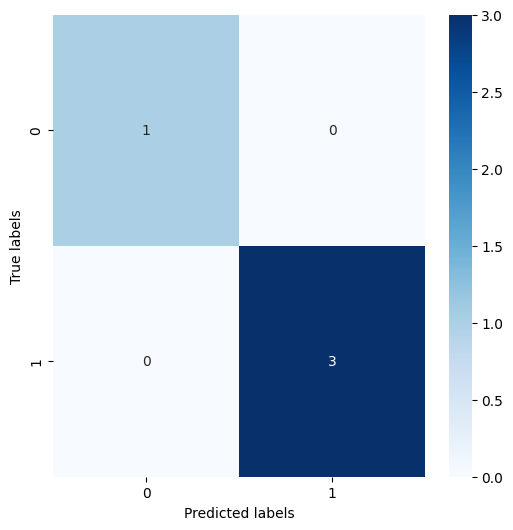

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# 分類レポートの表示
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [51]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: S8SEr003, Prediction: 0
Sample: S8SRuma018, Prediction: 1
Sample: S8SRuma024, Prediction: 1
Sample: S8SRuma027, Prediction: 1
